<a href="https://colab.research.google.com/github/JoyceSilveira/Desafios_Imersao_Dados_2/blob/main/Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solução dos desafios da aula 02
####Análise de uma amostra de dados do Enem 2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dados = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

df = pd.read_csv(dados)
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


#Desafio 1
###Pegar a amostra completa dos alunos de 13 e 14 anos

#Desafio 2
###Aumentar a amostra para alunos menor de idade e compara a proporção por estado.

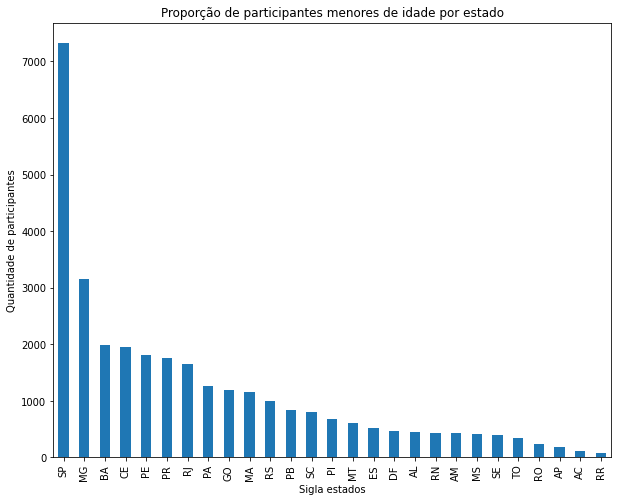

In [6]:
amostra_alunos = df.query("NU_IDADE <= 17")

_ = amostra_alunos["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(10,8))
_ = plt.title('Proporção de participantes menores de idade por estado')
_ = plt.xlabel('Sigla estados')
_ = plt.ylabel('Quantidade de participantes')
plt.show()

#Desafio 3
###Criar uma função para plotar o boxplot do seaborn

In [7]:
import seaborn as sns

In [10]:
def plotar_boxplot(largura, altura, eixo_x, eixo_y, dados, titulo):
  _ = plt.figure(figsize=(largura, altura))
  _ = sns.boxplot(x=eixo_x, y = eixo_y, data = dados)
  _ = plt.title(titulo)
  plt.show()

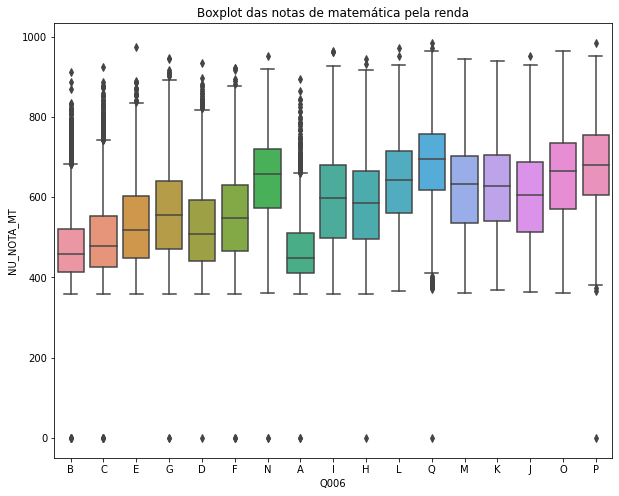

In [11]:
plotar_boxplot(10, 8, "Q006", "NU_NOTA_MT", df, "Boxplot das notas de matemática pela renda")

#Desafio 4
###Verificar se quem zerou a prova foi eliminado ou não estava presente

In [21]:
cn = df.query("NU_NOTA_CN == 0")["TP_PRESENCA_CN"].unique()
lc = df.query("NU_NOTA_LC == 0")["TP_PRESENCA_LC"].unique()
ch = df.query("NU_NOTA_CH == 0")["TP_PRESENCA_CH"].unique()
mt = df.query("NU_NOTA_MT == 0")["TP_PRESENCA_MT"].unique()
print(cn, lc, ch, mt)

[1] [1] [1] [1]


Em todas as provas, as pessoas que zeraram estavam presentes na prova

#Desafio 5
###Quem é eliminado tira zero ou será NaN (não teve registro de notas)

In [20]:
cn = df.query("TP_PRESENCA_CN == 2")["NU_NOTA_CN"].unique()
lc = df.query("TP_PRESENCA_LC == 2")["NU_NOTA_LC"].unique()
ch = df.query("TP_PRESENCA_CH == 2")["NU_NOTA_CH"].unique()
mt = df.query("TP_PRESENCA_MT == 2")["NU_NOTA_MT"].unique()
print(cn, lc, ch, mt)

[nan] [nan] [nan] [nan]


Em todas as provas, as pessoas que foram eliminadas receberam o registro NaN em suas notas

#Desafio 6
###Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

In [55]:
df.query("IN_TREINEIRO == 1")["Q006"].value_counts(normalize = "true").sort_index()

A    0.038699
B    0.196546
C    0.166677
D    0.077852
E    0.082267
F    0.055516
G    0.068632
H    0.062658
I    0.046296
J    0.030582
K    0.022206
L    0.019934
M    0.020129
N    0.028310
O    0.025258
P    0.024674
Q    0.033764
Name: Q006, dtype: float64

In [54]:
df.query("IN_TREINEIRO == 0")["Q006"].value_counts(normalize = "true").sort_index()

A    0.046830
B    0.256861
C    0.268148
D    0.101412
E    0.094625
F    0.042731
G    0.057779
H    0.034390
I    0.025353
J    0.014538
K    0.010180
L    0.007117
M    0.006966
N    0.009796
O    0.008377
P    0.006716
Q    0.008180
Name: Q006, dtype: float64

#Desafio 7
###Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

In [63]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
df["NU_NOTA_TOTAL"] = df[provas].sum(axis=1)

dados_sem_notas_zero = df.query("NU_NOTA_TOTAL != 0")

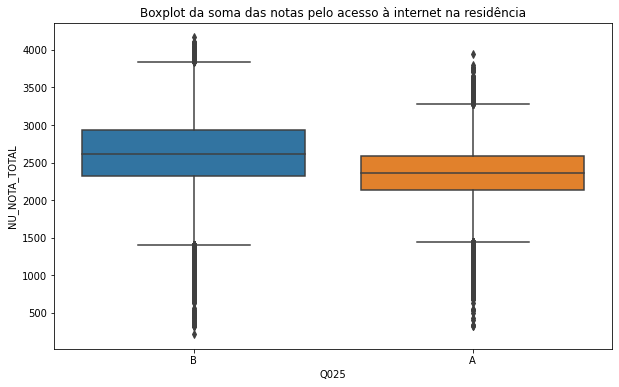

In [70]:
_ = plt.figure(figsize=(10, 6))
_ = sns.boxplot(x="Q025", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero)
_ = plt.title("Boxplot da soma das notas pelo acesso à internet na residência")
plt.show()

As pessoas que possuem acesso a internet (B) possuem uma concentração de notas maiores do que as pessoas que não possuem internet (A).
No atual momento de pandemia em que estamos vivendo, onde as aulas estão sendo EAD, tais pessoas sem internet estão com maiores dificuldades para estudar ou simplesmente não estão estudando. Isso provavelmente irá refletir ainda mais na diferença de notas do próximo Enem.